# Setup & Imports

In [36]:
# ------------------ Data Manipulation ------------------
import pandas as pd          # DataFrame operations
import numpy as np           # Numerical computations

# ------------------ Visualization ------------------
import matplotlib.pyplot as plt  # Basic plotting
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting support
import seaborn as sns             # Statistical visualization

# ------------------ Statistics & Analysis ------------------
from scipy.stats import pearsonr    # Pearson correlation
import scipy.stats as stats         # General statistical tools
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF

# ------------------ Machine Learning & Scaling ------------------
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Normalization and standardization
from sklearn.cluster import KMeans                              # KMeans clustering
from sklearn.preprocessing import PolynomialFeatures            # Polynomial basis for regression
from sklearn.linear_model import LinearRegression               # Linear regression model
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import joblib
import warnings
import json
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# ------------------ Optimization & Pareto Analysis ------------------
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting  # Pareto front identification

# ------------------ Geospatial Analysis ------------------
import geopandas as gpd         # Handling shapefiles and spatial data
import fiona                    # I/O support for geospatial formats
import pyogrio                  # Fast I/O for vector geodata
import rasterio                 # Raster data reading/writing
from rasterstats import zonal_stats  # Zonal statistics from rasters

# ------------------ Utility & System ------------------
import os                # File system interaction
import warnings          # Suppress warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

# ------------------ Pandas Display Settings ------------------
pd.options.display.float_format = '{:.4f}'.format         # Format float output
pd.set_option('display.max_columns', None)                # Show all columns

# ------------------ Matplotlib Settings ------------------
plt.rcParams['font.sans-serif'] = ['SimHei']              # Support Chinese characters
plt.rcParams['axes.unicode_minus'] = False                # Display minus signs correctly

# Inline plot display (only needed in notebooks)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import joblib
import json
import shap
import math

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import partial_dependence
from sklearn.utils import Bunch
from pdpbox import pdp

# Data & model imports

In [2]:
df = pd.read_csv('../data/grid500_36cities_with_eff_city.csv', index_col=0)
grid500 = df.copy()
print(grid500.shape)
grid500.head()

(194941, 89)


,Global_ID,City,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightVariety,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,baseAreaTotal,totalArea,areaVariance,buildingIntensity,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,balanceIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label,log_NTL2023_focal,log_VIT202311,Efficiency_RBF_k100,Efficiency_RBF_k300,Efficiency_RBF_k500,City_Beijing,City_Changchun,City_Changsha,City_Chengdu,City_Chongqing,City_Dalian,City_Fuzhou,City_Guangzhou,City_Guiyang,City_Haikou,City_Hangzhou,City_Harbin,City_Hefei,City_Hohhot,City_Jinan,City_Kunming,City_Lanzhou,City_Lasa,City_Nanchang,City_Nanjing,City_Nanning,City_Ningbo,City_Qingdao,City_Shanghai,City_Shenyang,City_Shenzhen,City_Shijiazhuang,City_Taiyuan,City_Tianjin,City_Urumqi,City_Wuhan,City_Xiamen,City_Xian,City_Xining,City_Yinchuan,City_Zhengzhou
0,0,Beijing,6.1850,7.0300,1649.8571,0.0000,31,93.0000,3.0000,3.0000,3.0000,0.0000,0.0323,0.0004,0.0000,180,6500.9830,209.7091,831.6324,32.5533,5.0701,0.5614,88704.5751,88704.5751,50961857.7000,0.3548,2861.4379,132998.2511,0.4670,0.0082,0.8024,234.6035,0.3548,0.3548,0.8366,0.8948,4.0000,0.0000,0.1994,5,1,5.8065,52.5611,14.9887,620.9377,268.0891,2565.5688,5.0000,2.0832,7.4090,0.9854,0.7748,0.6170,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1,Beijing,5.7400,7.2261,155.8571,0.0000,29,87.0000,3.0000,3.0000,3.0000,0.0000,0.0345,0.0003,0.0000,149,3810.3930,131.3929,272.1380,15.3292,5.1700,0.6206,33119.4905,33119.4905,1261729.8840,0.1325,1142.0514,196625.2176,0.6683,0.2644,0.8906,35.6626,0.1325,0.1325,0.8570,0.9383,12.0000,0.6365,0.1994,7,1,5.1379,34.2211,6.8159,594.1575,300.0878,2010.8442,5.0000,2.1073,5.0553,0.7232,0.6247,0.5762,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2,Beijing,11.3200,13.6167,57.1429,0.0000,22,66.0000,3.0000,3.0000,3.0000,0.0000,0.0455,0.0003,0.0000,117,3645.3976,165.6999,668.2643,28.7300,4.9243,0.5589,51092.8628,51092.8628,30358745.8300,0.2044,2322.4029,132197.3125,0.5288,0.0134,0.8982,151.4966,0.2044,0.2044,0.8818,0.9257,0.0000,0.0000,0.1994,1,0,5.3182,47.9015,17.3445,610.8432,283.8433,2044.7287,5.0000,2.6822,4.0629,0.7042,0.7341,0.7462,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,3,Beijing,11.7300,14.3617,243.5714,0.0000,8,24.0000,3.0000,3.0000,3.0000,0.0000,0.1250,0.0001,0.0000,42,1147.5982,143.4498,283.0113,75.6611,5.7024,0.5969,8534.6141,8534.6141,958399.8878,0.0341,1066.8268,205685.3683,0.8227,0.0179,0.9475,15.5408,0.0341,0.0341,0.9335,0.9785,0.0000,0.0000,0.1994,3,1,5.2500,35.9269,13.4894,474.1686,232.3126,1896.1434,5.0000,2.7319,5.4995,0.7108,0.7444,0.6683,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,4,Beijing,8.4500,9.1900,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,99.1487,0.0004,0.0000,0.9777,0.0000,0.

In [3]:
features = [
    'buildingCount', 'totalHeight', 'avgHeight', 'basePerimeterTotal',
    'basePerimeterAvg', 'compactness', 'baseAreaTotal', 'totalArea',
    'buildingIntensity', 'avgBuildingArea', 'FAR', 'coverageRatio',
    'roadDensity', 'intersectionDensity', 'poiDensity', 'poiDiversity',
    'FVC', 'permeableRatio', 'maxHeight', 'minHeight', 'heightRange', 'heightIndex',
    'heightDensity', 'heightVariety', 'cornerCountTotal', 'basePerimeterMax',
    'basePerimeterMin', 'shapeComplexity', 'areaVariance', 'parcelArea',
    'largestPatchIndex', 'shape3DIndex', 'balanceIndex', 'cornerCountAvg',
    'buildingProximity', 'buildingMinDist', 'buildingMaxDist',
    'buildingDistAvg', 'buildingDistVar', 'SVF', 'streetRatio'
]

targets = ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv']

In [4]:
city_dummies = pd.get_dummies(grid500['City'], prefix='City')

features_extended = features + list(city_dummies.columns)

print(f"🔢 Total features (including city codes): {len(features_extended)}")

🔢 Total features (including city codes): 77


In [5]:
len(city_dummies.columns)

36

In [20]:
# Define model folder
model_dir = "../output/models"

# Dictionary to store loaded models
models = {}

# Loop through each target, load the model and store in dict
for target in targets:
    model_path = os.path.join(model_dir, f"{target}_xgb_model.pkl")
    if os.path.exists(model_path):
        models[target] = joblib.load(model_path)
        print(f"✔ Loaded model for {target}")
    else:
        print(f"⚠ Model file not found: {model_path}")

✔ Loaded model for log_NTL2023_focal
✔ Loaded model for log_VIT202311
✔ Loaded model for UHIDAY2020_07_inv


In [21]:
grid500.describe()

,Global_ID,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightVariety,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,baseAreaTotal,totalArea,areaVariance,buildingIntensity,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,balanceIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label,log_NTL2023_focal,log_VIT202311,Efficiency_RBF_k100,Efficiency_RBF_k300,Efficiency_RBF_k500,City_Beijing,City_Changchun,City_Changsha,City_Chengdu,City_Chongqing,City_Dalian,City_Fuzhou,City_Guangzhou,City_Guiyang,City_Haikou,City_Hangzhou,City_Harbin,City_Hefei,City_Hohhot,City_Jinan,City_Kunming,City_Lanzhou,City_Lasa,City_Nanchang,City_Nanjing,City_Nanning,City_Ningbo,City_Qingdao,City_Shanghai,City_Shenyang,City_Shenzhen,City_Shijiazhuang,City_Taiyuan,City_Tianjin,City_Urumqi,City_Wuhan,City_Xiamen,City_Xian,City_Xining,City_Yinchuan,City_Zhengzhou
count,194941.0000,189742.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194352.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000,194941.0000
mean,98137.5063,28.8799,28.6458,1414.1441,-0.9852,46.6962,893.9083,16.5277,30.4150,9.5823,20.8327,0.0958,0.0036,0.3007,315.4169,4959.3202,112.0597,347.8203,22.6520,4.5490,0.5368,33192.6821,216494.2747,191423545.6962,0.8660,5437.0102,180006.9338,0.4993,185.2821,0.8606,255.1719,0.8660,0.1328,0.6177,0.8783,195.2786,1.0774,0.7656,4.5984,5.5898,6.1617,40.0369,15.0322,499.1627,203.2339,2063.9379,5.2614,3.2047,6.2240,0.7981,0.7617,0.6783,0.0750,0.0302,0.0171,0.0388,0.0333,0.0287,0.0114,0.0494,0.0136,0.0071,0.0388,0.0273,0.0175,0.0114,0.0353,0.0179,0.0161,0.0053,0.0143,0.0392,0.0150,0.0229,0.0414,0.0786,0.0337,0.0308,0.0151,0.0153,0.0624,0.0278,0.0438,0.0137,0.0266,0.0079,0.0097,0.0276
std,56862.9376,19.3648,17.8747,1821.2329,1.0008,50.9634,1035.4834,8.7200,24.2649,4.9080,23.9872,0.1677,0.0041,0.2783,352.3477,4245.3973,60.4275,230.3418,35.7254,1.4046,0.1661,27474.1264,210010.0240,2300870309.7094,0.8400,7776.0161,80149.4874,0.2857,50203.0422,0.1061,311.2227,0.8400,0.1099,0.1883,0.0961,382.8805,0.8089,0.5711,6.4617,12.9168,2.6955,36.3295,31.5569,212.1816,87.4249,1591.3603,1.7741,0.6445,1.8959,0.1450,0.1389,0.1569,0.2634,0.1712,0.1295,0.1932,0.1795,0.1671,0.1060,0.2166,0.1160,0.0841,0.1930,0.1630,0.1312,0.1063,0.1846,0.1327,0.1257,0.0723,0.1189,0.1940,0.1214,0.1495,0.1991,0.2692,0.1805,0.1728,0.1219,0.1229,0.2419,0.1643,0.2046,0.1162,0.1609,0.0886,0.0978,0.1637
min,0.0000,0.0000,0.0000,0.0000,-4.6000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,

In [23]:
# Model re-evaluate
# Set random seed to match training split
SEED = 42

# Store evaluation metrics for each model
evaluation_results = {}

for target in targets:
    print(f"\n📊 Evaluating model: {target}")
    
    model = models[target]
    print(model.get_params())
    
    # Extract features and target from full dataset
    X = grid500[features_extended].copy()
    X = grid500[features].copy()
    y = grid500[target].copy()

    # Use the same split strategy as training
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Compute metrics
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    test_r2 = r2_score(y_test, y_pred_test)

    # Store results
    evaluation_results[target] = {
        "Train_RMSE": train_rmse,
        "Test_RMSE": test_rmse,
        "Test_R2": test_r2
    }

# Convert to DataFrame
df_eval = pd.DataFrame.from_dict(evaluation_results, orient='index')
df_eval.reset_index(inplace=True)
df_eval.rename(columns={'index': 'Target'}, inplace=True)
df_eval = df_eval.round(4)

# Save to CSV
# save_path = "../output/model_evaluation_summary.csv"
# df_eval.to_csv(save_path, index=False)

# print(f"\n✅ Model evaluation summary saved to: {save_path}")
display(df_eval)


📊 Evaluating model: log_NTL2023_focal
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.03, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 9, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 500, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 2, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

📊 Evaluating model: log_VIT202311
{'objective': 'reg:squarederror', 'base_score

,Target,Train_RMSE,Test_RMSE,Test_R2
0,log_NTL2023_focal,0.3570,0.4478,0.5176
1,log_VIT202311,0.9067,1.0483,0.6970
2,UHIDAY2020_07_inv,0.5878,0.7378,0.4540


# Model interpret

- **Using all samples** instead of using training datasets provides more robust insights into how urban form indicators affect performance indices.
- It ensures that all cities and morphological contexts are included, especially important when analyzing diverse urban conditions.
- The model has already been trained and fixed, so using the full dataset does not cause information leakage or bias.

- **Using models trained with 41 urban form indicators** without one-hot city encoding

## Feature importance + ranking

In [24]:
import os
import pandas as pd

# Ensure the output folder exists
os.makedirs("../output/feature_importance_logs", exist_ok=True)

# Dictionary to collect importance data
importance_all = {}

# Loop over targets to compute and store importance
for target in targets:
    model = models[target]
    booster = model.get_booster()
    importance_dict = booster.get_score(importance_type='gain')

    # Convert to DataFrame, fill missing features with 0
    importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=[f'Importance_{target}'])
    importance_df.index.name = 'Feature'
    importance_all[target] = importance_df

# Merge all importance DataFrames on 'Feature'
combined_importance = pd.concat(importance_all.values(), axis=1)
combined_importance.index.name = 'Feature'
combined_importance = combined_importance.fillna(0).reset_index()

# Optional: reorder by average importance across targets
mean_col = combined_importance.iloc[:, 1:].mean(axis=1)
combined_importance.insert(1, 'MeanImportance', mean_col)
combined_importance.sort_values(by='MeanImportance', ascending=False, inplace=True)

# Save to CSV
combined_csv_path = "../output/feature_importance_logs/combined_feature_importance.csv"
combined_importance.to_csv(combined_csv_path, index=False)
print(f"✅ Combined feature importance saved to: {combined_csv_path}")

✅ Combined feature importance saved to: ../output/feature_importance_logs/combined_feature_importance.csv


## Partial dependence plots

### One-way PDPs

#### Using sklearn

#### PDP with ICE and smoothed (TBC due to speed)

In [ ]:
# Plot config
max_ice_curves = 100     # max ICE curves per feature
grid_resolution = 50     # reduce PDP resolution for faster plotting
smoothing_window = 3     # rolling average window

for feature in features_extended:
    print(f"📉 Processing: {feature}")

    # PDP + ICE computation
    try:
        pd_result: Bunch = partial_dependence(
            model, X_sample, features=[feature], kind='both',
            grid_resolution=grid_resolution
        )
    except Exception as e:
        print(f"⚠️ Skipping {feature}: PDP computation failed due to {e}")
        continue

    feature_vals = pd_result['values'][0]
    pdp_mean = pd_result['average'][0]
    # ice_curves = pd_result['individual'][0]

    # Smooth the PDP using rolling average
    # pdp_smoothed = pd.Series(pdp_mean).rolling(window=smoothing_window, center=True).mean()

    # Plot
    plt.figure(figsize=(8, 5))

    # ICE curves (up to max)
    for row in ice_curves[:max_ice_curves]:
        plt.plot(feature_vals, row, color='gray', alpha=0.15)

    # PDP curve
    plt.plot(feature_vals, pdp_mean, color='red', linewidth=2, label='PDP (mean)')

    # Smoothed PDP curve
    # plt.plot(feature_vals, pdp_smoothed, color='blue', linestyle='--', linewidth=2, label='Smoothed PDP')

    # Formatting
    plt.xlabel(feature)
    plt.ylabel(f'Predicted {target}')
    plt.title(f'PDP: {feature}')
    plt.legend()
    plt.tight_layout()

    # Save figure
    fig_path = f"{OUTPUT_DIR}/{target}_PDP_{feature}.png"
    plt.savefig(fig_path, dpi=300)
    plt.close()
    print(f"✅ Saved: {fig_path}")

In [59]:
# Create output directory
OUTPUT_DIR = "../output/interpret_models/pdp_plots/sklearn"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Loop through each target
for target in targets:
    print(f"\n📊 Generating PDPs for target: {target}")

    # Load model for current target
    model = models[target]

    # Filter input data
    df_target = grid500.dropna(subset=[target] + features).copy()
    X = df_target[features]
    y = df_target[target]

    print(f"▶ Data shape for {target}: X = {X.shape}, y = {y.shape}")

    # Loop through features
    for feature in features:
        try:
            fig, ax = plt.subplots(figsize=(6, 4))
            display = PartialDependenceDisplay.from_estimator(
                model,
                X,
                features=[feature],
                ax=ax,
                grid_resolution=50,
                kind='average'
            )
    
            plt.title(f'{feature}_PDP_{target}')
            plt.tight_layout()
    
            # Save the plot
            save_path = f"{OUTPUT_DIR}/{feature}_PDP_{target}.png"
            plt.savefig(save_path, dpi=300)
            plt.close()
            print(f"✅ Saved to: {save_path}")

        except Exception as e:
            print(f"⚠️ Skipped {feature} due to error: {e}")


📊 Generating PDPs for target: log_NTL2023_focal
▶ Data shape for log_NTL2023_focal: X = (194941, 41), y = (194941,)
✅ Saved to: ../output/interpret_models/pdp_plots/sklearn/buildingCount_PDP_log_NTL2023_focal.png
✅ Saved to: ../output/interpret_models/pdp_plots/sklearn/totalHeight_PDP_log_NTL2023_focal.png
✅ Saved to: ../output/interpret_models/pdp_plots/sklearn/avgHeight_PDP_log_NTL2023_focal.png
✅ Saved to: ../output/interpret_models/pdp_plots/sklearn/basePerimeterTotal_PDP_log_NTL2023_focal.png
✅ Saved to: ../output/interpret_models/pdp_plots/sklearn/basePerimeterAvg_PDP_log_NTL2023_focal.png
✅ Saved to: ../output/interpret_models/pdp_plots/sklearn/compactness_PDP_log_NTL2023_focal.png
✅ Saved to: ../output/interpret_models/pdp_plots/sklearn/baseAreaTotal_PDP_log_NTL2023_focal.png
✅ Saved to: ../output/interpret_models/pdp_plots/sklearn/totalArea_PDP_log_NTL2023_focal.png
✅ Saved to: ../output/interpret_models/pdp_plots/sklearn/buildingIntensity_PDP_log_NTL2023_focal.png
✅ Saved to

#### Using pdpbox

In [58]:
# Create output directory
OUTPUT_DIR = "../output/interpret_models/pdp_plots/pdpbox"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Loop through each target
for target in targets:
    print(f"\n📊 Generating PDPs for target: {target}")

    # Load model for current target
    model = models[target]

    # Filter input data
    df_target = grid500.dropna(subset=[target] + features).copy()
    X = df_target[features]
    y = df_target[target]

    print(f"▶ Data shape for {target}: X = {X.shape}, y = {y.shape}")

    # Loop through features
    for feature in features:
        try:
            pdp_obj = pdp.PDPIsolate(
                model=model,
                df=X,
                model_features=features,
                feature=feature,
                feature_name=feature,
                n_classes=0,
            )

            # Plot PDP + ICE
            fig, axes = pdp_obj.plot(
                center=True, # centered
                plot_lines=True, # lines
                frac_to_plot=100,
                cluster=False,
                n_cluster_centers=None,
                cluster_method='accurate',
                plot_pts_dist=True,
                to_bins=True,
                show_percentile=True,
                which_classes=None,
                figsize=None,
                dpi=300,
                ncols=2,
                plot_params={"pdp_hl": True},
                engine='matplotlib',
                template='plotly_white',
            )

            # Title and save
            fig.suptitle(f"PDP: {feature}_PDP_{target}", fontsize=14)
            fig.tight_layout()
            save_path = f"{OUTPUT_DIR}/{feature}_PDP_{target}.png"
            plt.savefig(save_path, dpi=300)
            plt.close(fig)
            print(f"✅ Saved to: {save_path}")

        except Exception as e:
            print(f"⚠️ Skipped {feature} for {target} due to error: {e}")


📊 Generating PDPs for target: log_NTL2023_focal
▶ Data shape for log_NTL2023_focal: X = (194941, 41), y = (194941,)
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingCount_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/totalHeight_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/avgHeight_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterTotal_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterAvg_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/compactness_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/baseAreaTotal_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/totalArea_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingIntensity_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/avgBuildingArea_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/FAR_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/coverageRatio_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/roadDensity_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/intersectionDensity_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/poiDensity_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/poiDiversity_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/FVC_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/permeableRatio_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/maxHeight_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/5 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/minHeight_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/7 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightRange_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightIndex_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightDensity_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightVariety_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/cornerCountTotal_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterMax_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterMin_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/shapeComplexity_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/areaVariance_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/parcelArea_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/largestPatchIndex_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/shape3DIndex_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/balanceIndex_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/cornerCountAvg_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingProximity_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingMinDist_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingMaxDist_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingDistAvg_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingDistVar_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/SVF_PDP_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/streetRatio_PDP_log_NTL2023_focal.png

📊 Generating PDPs for target: log_VIT202311
▶ Data shape for log_VIT202311: X = (194941, 41), y = (194941,)
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingCount_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/totalHeight_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/avgHeight_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterTotal_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterAvg_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/compactness_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/baseAreaTotal_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/totalArea_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingIntensity_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/avgBuildingArea_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/FAR_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/coverageRatio_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/roadDensity_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/intersectionDensity_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/poiDensity_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/poiDiversity_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/FVC_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/permeableRatio_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/maxHeight_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/5 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/minHeight_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/7 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightRange_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightIndex_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightDensity_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightVariety_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/cornerCountTotal_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterMax_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterMin_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/shapeComplexity_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/areaVariance_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/parcelArea_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/largestPatchIndex_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/shape3DIndex_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/balanceIndex_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/cornerCountAvg_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingProximity_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingMinDist_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingMaxDist_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingDistAvg_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingDistVar_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/SVF_PDP_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/streetRatio_PDP_log_VIT202311.png

📊 Generating PDPs for target: UHIDAY2020_07_inv
▶ Data shape for UHIDAY2020_07_inv: X = (194941, 41), y = (194941,)
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingCount_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/totalHeight_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/avgHeight_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterTotal_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterAvg_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/compactness_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/baseAreaTotal_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/totalArea_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingIntensity_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/avgBuildingArea_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/FAR_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/coverageRatio_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/roadDensity_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/intersectionDensity_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/poiDensity_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/poiDiversity_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/FVC_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/permeableRatio_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/maxHeight_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/5 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/minHeight_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/7 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightRange_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightIndex_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightDensity_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/heightVariety_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/cornerCountTotal_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterMax_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/basePerimeterMin_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/shapeComplexity_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/areaVariance_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/parcelArea_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/largestPatchIndex_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/shape3DIndex_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/balanceIndex_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/cornerCountAvg_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingProximity_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingMinDist_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingMaxDist_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingDistAvg_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/buildingDistVar_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/SVF_PDP_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/pdpbox/streetRatio_PDP_UHIDAY2020_07_inv.png


### Two-way PDPs

**Selecting Feature Pairs for Interaction PDP Analysis**
- High individual importance: Each variable was chosen based on its relatively high individual importance in XGBoost models across three sustainability targets, ensuring meaningful contribution when considered jointly.
- Potential non-linear synergy: Feature combinations such as FVC × SVF, buildingProximity × FVC, and compactness × permeableRatio represent non-linear ecological-morphological synergies likely to affect outcomes like UHI or vitality.
- Functional-structural dynamics: Pairs like poiDiversity × shapeComplexity explore the interaction of functional diversity and spatial complexity, relevant to understanding vitality and human activity intensity.
- Built form efficiency patterns: Interactions like FAR × heightVariety or basePerimeterTotal × compactness examine how development intensity and volumetric form interact to impact sustainability metrics.
- Empirical interpretability: Each selected pair is empirically interpretable and allows actionable insights for planners—e.g., whether adding more permeability still improves performance in compact blocks.

In [73]:
# Define interaction feature pairs based on feature importance
interaction_pairs = [
    ('basePerimeterTotal', 'intersectionDensity'),
    ('buildingIntensity', 'FVC'),
    ('parcelArea', 'maxHeight'),
    ('SVF', 'totalArea'),
    ('roadDensity', 'buildingDistAvg'),
    ('poiDiversity', 'buildingProximity'),
    ('intersectionDensity', 'streetRatio'),
    ('coverageRatio', 'FVC'),
    ('basePerimeterTotal', 'compactness'),
    ('buildingIntensity', 'parcelArea'),
    ('SVF', 'maxHeight'),
    ('buildingDistAvg', 'FVC'),
    ('avgHeight', 'totalArea'),
    ('buildingMinDist', 'poiDiversity'),
    ('basePerimeterTotal', 'buildingIntensity')
]

# Create output directory
OUTPUT_DIR = "../output/interpret_models/pdp_plots/2way_pdpbox"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Loop through each target model
for target in targets:
    print(f"\n📊 Generating PDPs for target: {target}")

    # Load model for current target
    model = models[target]

    # Prepare filtered input data
    df_target = grid500.dropna(subset=[target] + features).copy()
    X = df_target[features]
    y = df_target[target]

    print(f"▶ Data shape for {target}: X = {X.shape}, y = {y.shape}")

    # Loop through interaction feature pairs
    for (feat1, feat2) in interaction_pairs:
        try:
            pdp_inter = pdp.PDPInteract(
                model=model,
                df=X,
                model_features=features,
                features=[feat1, feat2],
                feature_names=[feat1, feat2],
                n_classes=0,
            )

            # Plot contour-based interaction PDP
            fig, axes = pdp_inter.plot(
                plot_type="contour",
                to_bins=True,
                plot_pdp=True,
                show_percentile=True,
                figsize=(800, 1000),
                dpi=300,
                engine="plotly",
                template="plotly_white"
            )
           
            # Save
            save_path = f"{OUTPUT_DIR}/{feat1}_{feat2}_PDP_interact_{target}.png"
            fig.write_image(save_path)
            print(f"✅ Saved to: {save_path}")

        except Exception as e:
            print(f"⚠️ Skipped interaction PDP ({feat1}, {feat2}) for target {target} due to error: {e}")


📊 Generating PDPs for target: log_NTL2023_focal
▶ Data shape for log_NTL2023_focal: X = (194941, 41), y = (194941,)
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/basePerimeterTotal_intersectionDensity_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingIntensity_FVC_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/parcelArea_maxHeight_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/SVF_totalArea_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/roadDensity_buildingDistAvg_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/poiDiversity_buildingProximity_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/intersectionDensity_streetRatio_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/coverageRatio_FVC_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/basePerimeterTotal_compactness_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingIntensity_parcelArea_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/SVF_maxHeight_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingDistAvg_FVC_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/90 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/avgHeight_totalArea_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingMinDist_poiDiversity_PDP_interact_log_NTL2023_focal.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/basePerimeterTotal_buildingIntensity_PDP_interact_log_NTL2023_focal.png

📊 Generating PDPs for target: log_VIT202311
▶ Data shape for log_VIT202311: X = (194941, 41), y = (194941,)
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/basePerimeterTotal_intersectionDensity_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingIntensity_FVC_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/parcelArea_maxHeight_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/SVF_totalArea_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/roadDensity_buildingDistAvg_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/poiDiversity_buildingProximity_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/intersectionDensity_streetRatio_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/coverageRatio_FVC_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/basePerimeterTotal_compactness_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingIntensity_parcelArea_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/SVF_maxHeight_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingDistAvg_FVC_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/90 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/avgHeight_totalArea_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingMinDist_poiDiversity_PDP_interact_log_VIT202311.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/basePerimeterTotal_buildingIntensity_PDP_interact_log_VIT202311.png

📊 Generating PDPs for target: UHIDAY2020_07_inv
▶ Data shape for UHIDAY2020_07_inv: X = (194941, 41), y = (194941,)
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/basePerimeterTotal_intersectionDensity_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingIntensity_FVC_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/parcelArea_maxHeight_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/SVF_totalArea_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/roadDensity_buildingDistAvg_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/poiDiversity_buildingProximity_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/intersectionDensity_streetRatio_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/coverageRatio_FVC_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/basePerimeterTotal_compactness_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingIntensity_parcelArea_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/SVF_maxHeight_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingDistAvg_FVC_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/90 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/avgHeight_totalArea_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/8 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/80 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/buildingMinDist_poiDiversity_PDP_interact_UHIDAY2020_07_inv.png
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Saved to: ../output/interpret_models/pdp_plots/2way_pdpbox/basePerimeterTotal_buildingIntensity_PDP_interact_UHIDAY2020_07_inv.png


### SHAP

PermutationExplainer explainer: 1001it [05:10,  3.15it/s]                                                                            


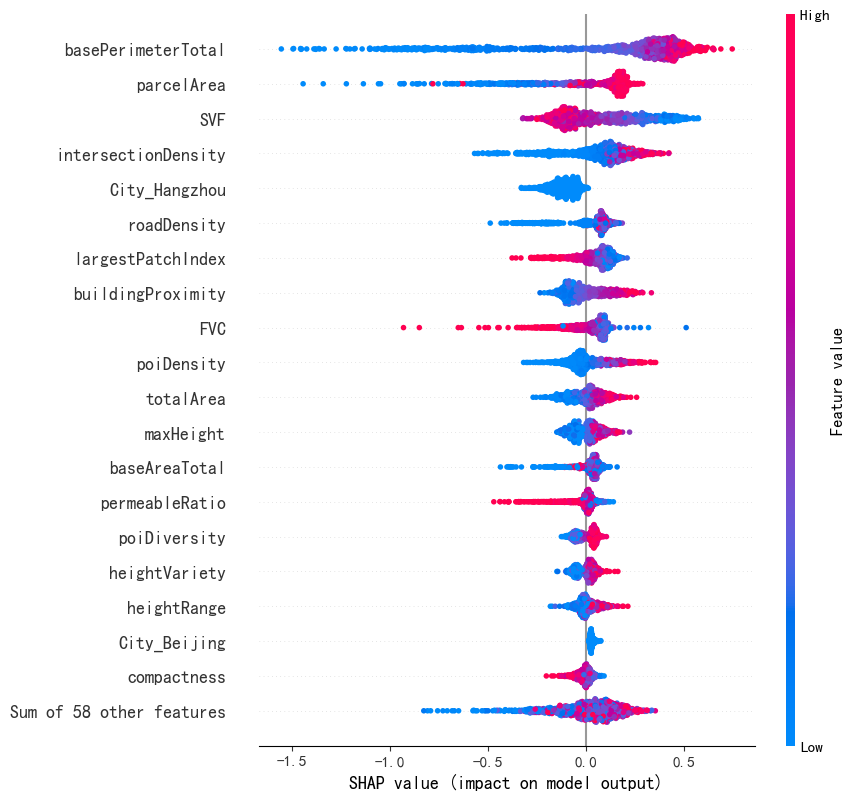

In [10]:
# Step 1: Load model (XGBoost 2.x trained)
model = models['log_VIT202311']  # your preloaded model

# Step 2: Select background and target data
X_all = grid500[features_extended]
X_background = X_all.sample(500, random_state=42)  # Background set for SHAP kernel

# Step 3: Wrap model.predict as callable
explainer = shap.Explainer(model.predict, X_background)

# Step 4: SHAP values for a specific city (e.g., Hangzhou)
X_hz = X_all[grid500["City"] == "Hangzhou"]
X_hz_sample = X_hz.sample(n=1000, random_state=42) if len(X_hz) > 1000 else X_hz

shap_values = explainer(X_hz_sample)

# Step 5: Plot summary
shap.plots.beeswarm(shap_values, max_display=20)